# Library used

In [164]:
import folium as folium
import pandas as pd
import matplotlib.pyplot as plt

# Data cleanup

In [145]:
# Removing unwanted columns from data frame
def cleaningColumns(dataF):
    dataF.drop('type_emplacement', axis=1, inplace=True)
    dataF.drop('domanialite', axis=1, inplace=True)
    dataF.drop('complement_addresse', axis=1, inplace=True)
    dataF.drop('numero', axis=1, inplace=True)
    dataF.drop('id_emplacement', axis=1, inplace=True)
    dataF.drop('variete', axis=1, inplace=True)
    dataF.drop('stade_developpement', axis=1, inplace=True)
    dataF.drop('remarquable', axis=1, inplace=True)
    return dataF


# Removing unwanted lines from data frame
def cleaningRows(dataF):
    dataF.drop(dataF.index[(dataF["circonference_cm"] <= 0)], axis=0, inplace=True)
    dataF.drop(dataF.index[(dataF["hauteur_m"] <= 0)], axis=0, inplace=True)
    # biggest circumference paris tree 7m -> 700 cm
    dataF.drop(dataF.index[(dataF["circonference_cm"] > 700)], axis=0, inplace=True)
    # tallest paris tree 35 m -> 3500 cm
    dataF.drop(dataF.index[(dataF["hauteur_m"] > 40)], axis=0, inplace=True)
    return dataF

# Useful functions

In [146]:
# Returns tree number
def getTreeNumber(dataF):
    count = len(dataF)
    print("Total number of trees:", count, '\n')
    return count


# Returns data frame columns
def getColumns(dataF):
    return dataF.columns.values


# Prints data frame's columns
def printColumns(col):
    print(col)
    print(len(col))

# Retrieving data from the csv file

In [147]:
filename = "./resources/p2-arbres-fr.csv"
data = pd.read_csv(filename, encoding='utf-8', sep=';')
data

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,2024741,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170151,NaN,Castanea,fargesii,NaN,0,0,NaN,0.0,48.821957,2.456264
200133,2024742,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170152,Arbre aux mouchoirs,Davidia,involucrata,NaN,0,0,NaN,0.0,48.823254,2.457935
200134,2024743,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170153,Peuplier,Populus,simonii,NaN,0,0,NaN,0.0,48.822907,2.457970
200135,2024744,Arbre,Jardin,BOIS DE VINCENNES,NaN,NaN,ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...,720170154,Chêne,Quercus,n. sp.,NaN,0,0,NaN,0.0,48.822522,2.455956


In [148]:
# Important values 
columns = getColumns(data)
row_count = getTreeNumber(data)
PARIS_LOCATION = (48.856614, 2.3522219)

Total number of trees: 200137 



In [149]:
# Data clean up
data = cleaningColumns(data)
data = cleaningRows(data)

# Data after cleanup

In [150]:
# Save cleaned up csv
data.to_csv('./resources/cleanedDF.csv', encoding='utf-8', sep=';', index=False)
data.reset_index(drop=True)

,id,arrondissement,lieu,libelle_francais,genre,espece,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
0,99874,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,Aesculus,hippocastanum,20,5,48.857620,2.320962
1,99875,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,65,8,48.857656,2.321031
2,99876,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,90,10,48.857705,2.321061
3,99877,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,Acer,negundo,60,8,48.857722,2.321006
4,99881,PARIS 16E ARRDT,SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...,Platane,Platanus,x hispanica,260,17,48.876722,2.280222
...,...,...,...,...,...,...,...,...,...,...
159918,2023464,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5,48.848074,2.409116
159919,2023465,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5,48.848226,2.409147
159920,2023466,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5,48.848379,2.409179
159921,2023467,PARIS 20E ARRDT,RUE DU GENERAL NIESSEL,Chêne,Quercus,cerris,20,5,48.848533,2.409209


# Work on the data

## Species percentage in Paris

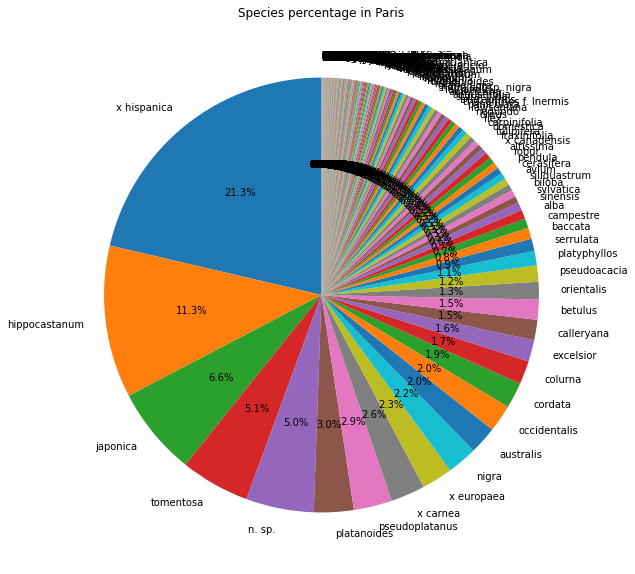

In [151]:
# Top 10 most present species in Paris
species_group = data.assign(dummy='').groupby(['espece']).size().sort_values(ascending=False)
species_group.plot(kind='pie', subplots=True, startangle=90, figsize=(15, 10), autopct='%1.1f%%')
plt.title('Species percentage in Paris')
plt.ylabel('')
plt.savefig("./resources/species_percentage.png")
plt.show()

## Tree number percentage per district

### On a wheel

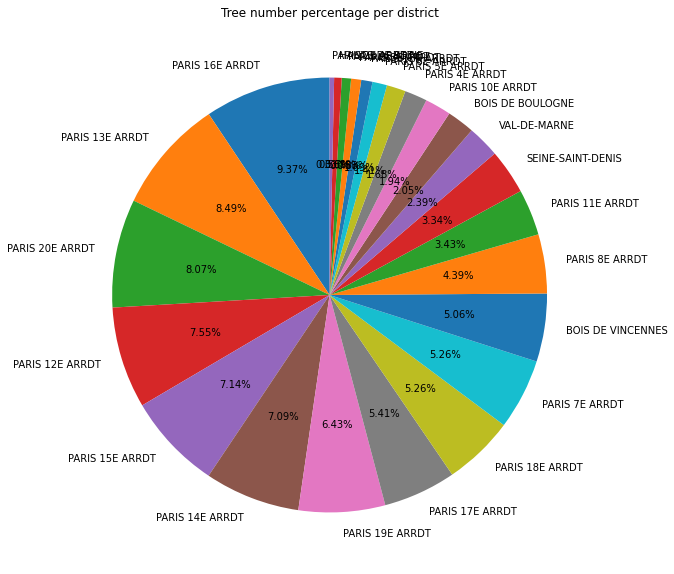

In [161]:
# Tree number percentage per 'arrondissement'
district_group = data.assign(dummy='').groupby(['arrondissement']).size().sort_values(ascending=False)
district_group.plot(kind='pie', subplots=True, startangle=90, figsize=(15, 10), autopct='%1.2f%%')
plt.title('Tree number percentage per district')
plt.ylabel('')
plt.savefig("./resources/tree_number_percentage_per_district.png")
plt.show()

### On the map

In [176]:
# Districts' geolocalisation
district_geoloc={'BOIS DE BOULOGNE' : (48.8635, 2.2501),
                 'BOIS DE VINCENNES': (48.8283, 2.4332),
                 'HAUTS-DE-SEINE'   : (48.8405, 2.2382),
                 'PARIS 10E ARRDT'  : (48.8150, 2.3566),
                 'PARIS 11E ARRDT'  : (48.8023, 2.3785),
                 'PARIS 12E ARRDT'  : (48.7842, 2.3868),
                 'PARIS 13E ARRDT'  : (48.7770, 2.3566),
                 'PARIS 14E ARRDT'  : (48.7770, 2.3264),
                 'PARIS 15E ARRDT'  : (48.9820, 2.0650),
                 'PARIS 16E ARRDT'  : (48.8060, 2.2769),
                 'PARIS 17E ARRDT'  : (48.8277, 2.3209),
                 'PARIS 18E ARRDT'  : (48.8367, 2.3456),
                 'PARIS 19E ARRDT'  : (48.8259, 2.3813),
                 'PARIS 1ER ARRDT'  : (48.8042, 2.3428),
                 'PARIS 20E ARRDT'  : (48.8096, 2.3978),
                 'PARIS 2E ARRDT'   : (48.8114, 2.3401),
                 'PARIS 3E ARRDT'   : (48.8078, 2.3621),
                 'PARIS 4E ARRDT'   : (48.8005, 2.3566),
                 'PARIS 5E ARRDT'   : (48.7897, 2.3456),
                 'PARIS 6E ARRDT'   : (48.7951, 2.3318),
                 'PARIS 7E ARRDT'   : (48.8005, 2.3209),
                 'PARIS 8E ARRDT'   : (48.8222, 2.3181),
                 'PARIS 9E ARRDT'   : (48.8168, 2.3401),
                 'SEINE-SAINT-DENIS': (48.8801, 2.3538),
                 'VAL-DE-MARNE'     : (48.7191, 2.4637)
                 }

# Tree number per district
numb_per_district = data.assign(dummy='').groupby(['arrondissement']).size()

# Creating map
m = folium.Map(location=[48.856614, 2.3522219], width=750, height=500)

# Placing markers for each district on the map
for index, value in numb_per_district.items():
    if index in district_geoloc:
        localisation = district_geoloc[index]
        text = str(value) +" trees are planted in ", index
        marker = folium.Marker(
            location=localisation,
            popup=text)
        marker.add_to(m)
        print(index, ':  ', value, '\n')

# Printing
m

BOIS DE BOULOGNE :   3278 

BOIS DE VINCENNES :   8086 

HAUTS-DE-SEINE :   894 

PARIS 10E ARRDT :   3104 

PARIS 11E ARRDT :   5483 

PARIS 12E ARRDT :   12070 

PARIS 13E ARRDT :   13570 

PARIS 14E ARRDT :   11331 

PARIS 15E ARRDT :   11420 

PARIS 16E ARRDT :   14990 

PARIS 17E ARRDT :   8651 

PARIS 18E ARRDT :   8413 

PARIS 19E ARRDT :   10280 

PARIS 1ER ARRDT :   1333 

PARIS 20E ARRDT :   12899 

PARIS 2E ARRDT :   534 

PARIS 3E ARRDT :   1200 

PARIS 4E ARRDT :   2684 

PARIS 5E ARRDT :   2258 

PARIS 6E ARRDT :   1739 

PARIS 7E ARRDT :   8409 

PARIS 8E ARRDT :   7025 

PARIS 9E ARRDT :   1098 

SEINE-SAINT-DENIS :   5344 

VAL-DE-MARNE :   3830 



## Tree number percentage per place

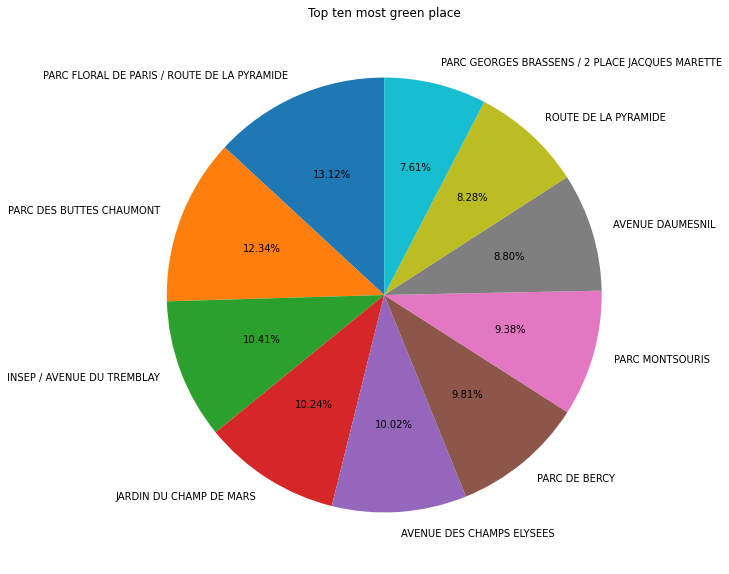

In [163]:
# Tree number percentage per place
place_group = data.assign(dummy=1).groupby(['lieu']).size().sort_values(ascending=False)
place_group.head(10).plot(kind='pie', subplots=True, startangle=90, figsize=(15, 10), autopct='%1.2f%%')
plt.title('Top ten most green place')
plt.ylabel('')
plt.savefig("./resources/top_ten_most_green_places.png")
plt.show()

## Average height per arrondissement

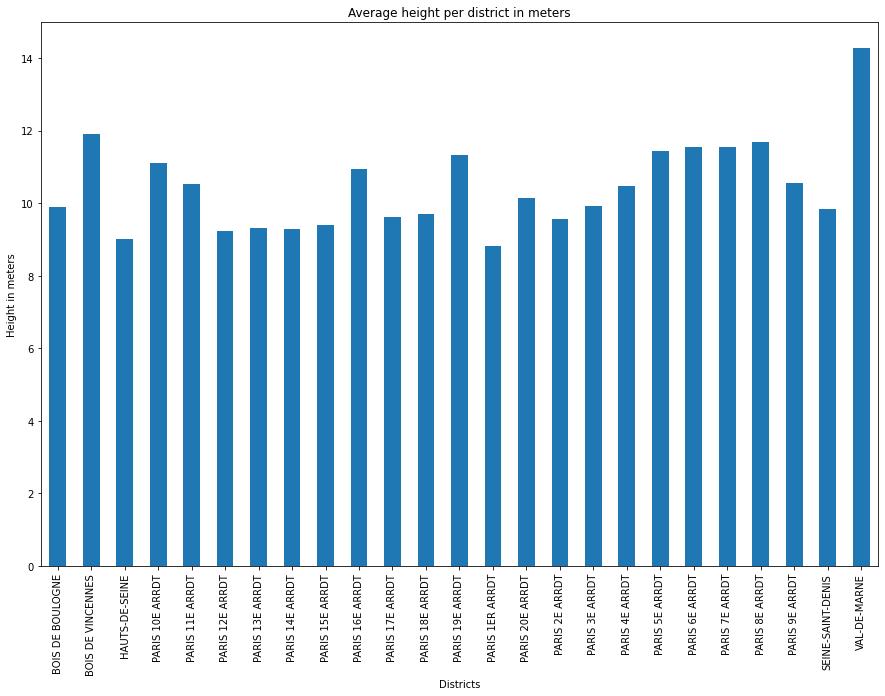

In [162]:
# Average height per arrondissement
height_mean = data.groupby(['arrondissement'])['hauteur_m'].mean().reset_index().plot(x='arrondissement',
                                                                                       y='hauteur_m',
                                                                                       kind='bar', 
                                                                                       subplots=True,
                                                                                       figsize=(15, 10),
                                                                                       legend=None)
plt.title('Average height per district in meters')
plt.xlabel('Districts')
plt.ylabel('Height in meters')
plt.savefig("./resources/average_height_per_arrondissement.png")
plt.show()

## Average circumference per district

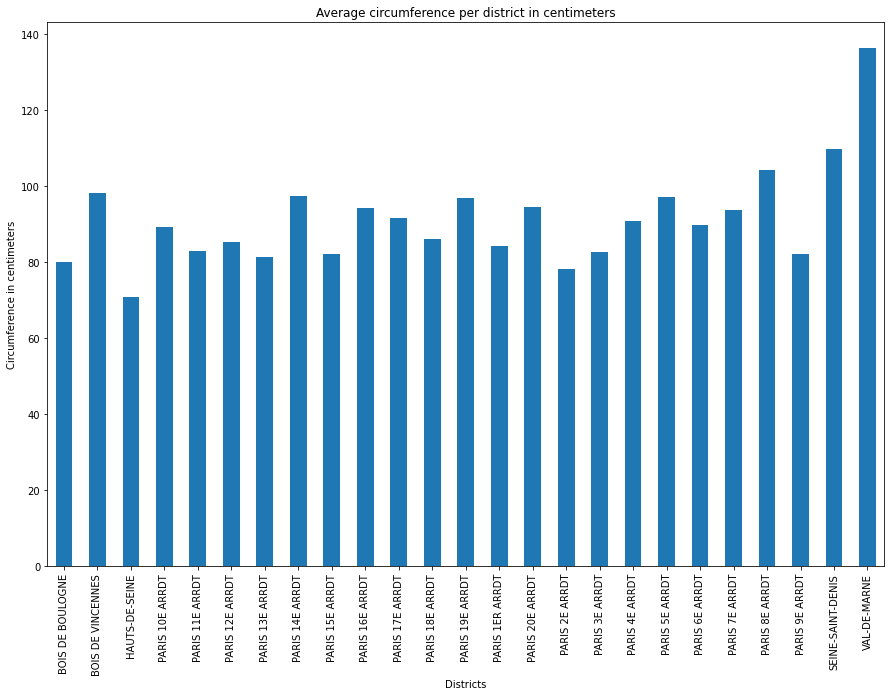

In [156]:
# Circumference average per arrondissement
circum_mean = data.groupby(['arrondissement'])['circonference_cm'].mean().reset_index().plot(x='arrondissement',
                                                                                             y='circonference_cm',
                                                                                             kind='bar',
                                                                                             subplots=True,
                                                                                             figsize=(15, 10),
                                                                                             legend=None)
plt.title('Average circumference per district in centimeters')
plt.xlabel('Districts')
plt.ylabel('Circumference in centimeters')
plt.savefig("./resources/average_circumference_per_district.png")
plt.show()